### HW1

### Задание
### 1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

#### а) зависимость цены на недвижимость в конкретном регионе от времени,

Временной ряд, есть связь во времени

#### б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

Временной ряд, скорость изменяется во времени

#### в) количество отказов компьютера,

Не временной ряд. Для одного компьютера это случайная величина. 

#### г) число обращений в поликлинику по району,

Временной ряд. Если вести учет обращений во времени.

#### д) координаты автобуса при движении по маршруту,

Временной ряд, если смотрим их при движении во времени

#### е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

Временной ряд, если смотрим их изменение за промежуток времени 

### 2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [45]:
df = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [47]:
df['DUQ_MW'].isnull().sum()

0

119068 не нулевых строк с datetime индексом с периодичностью в час.

Text(0, 0.5, 'МВт')

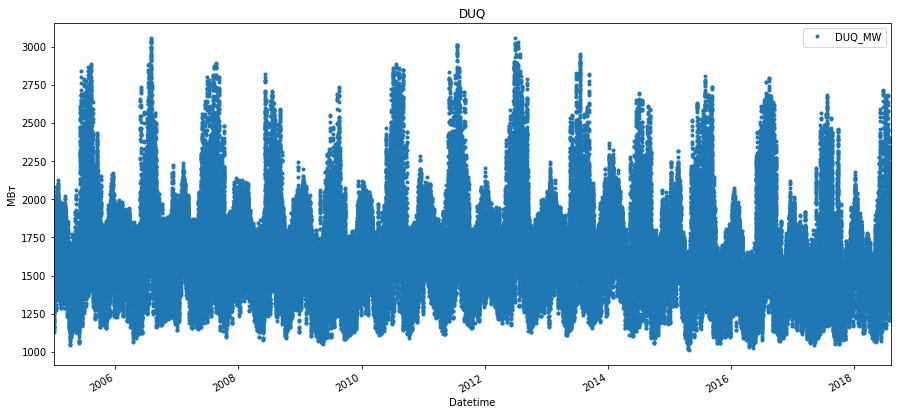

In [48]:
df.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ' )
plt.ylabel ( 'МВт' )

Выраженная цикличность без провалов

In [49]:
df['date'] = df.index

Проверим все ли значения в датасете уникальны

In [50]:
ut = df['date'].unique()
ut.shape[0],' из ', df.shape[0]

(119064, ' из ', 119068)

In [51]:
count_data = df['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

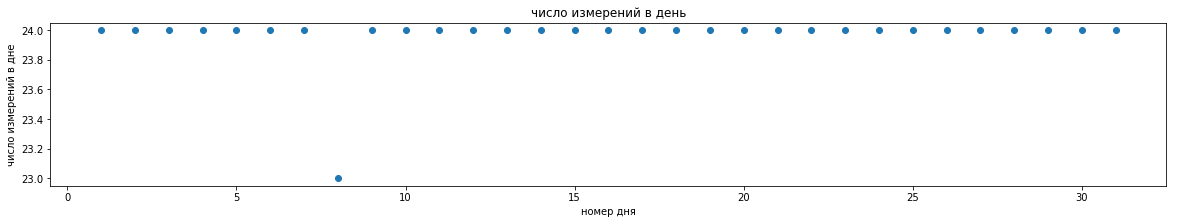

In [52]:
day_H=df['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

Дублируются индексы времени в ноябре и недостает индексов в марте из года в год,  это переход на зимнее и летнее время

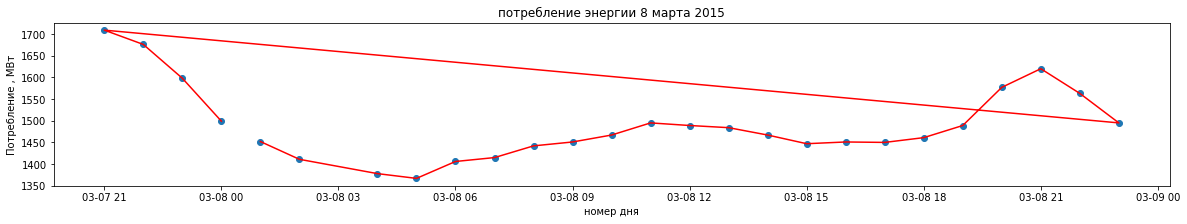

In [53]:
plt.figure(figsize=(20,3))
plt.plot(df['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,df['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(df['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,df['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2015-03-08 03:00:00', '2015-03-08 03:00:00']))

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')

plt.show()

Имеем разрыв, обозначающий переход на летнее время и нарушение сортировки по времени (2015-03-07 00:00:00 идет за 2015-03-07 23:00:00)

### 3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [54]:
df_daily = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [55]:
df_monthly_s = df_daily.resample("M").std()
df_monthly_m = df_daily.resample("M").mean()
df_monthly_m.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [56]:
df_weekly_s = df_daily.resample("W").std()
df_weekly_m = df_daily.resample("W").mean()
df_weekly_m.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Text(0.5, 0, 't')

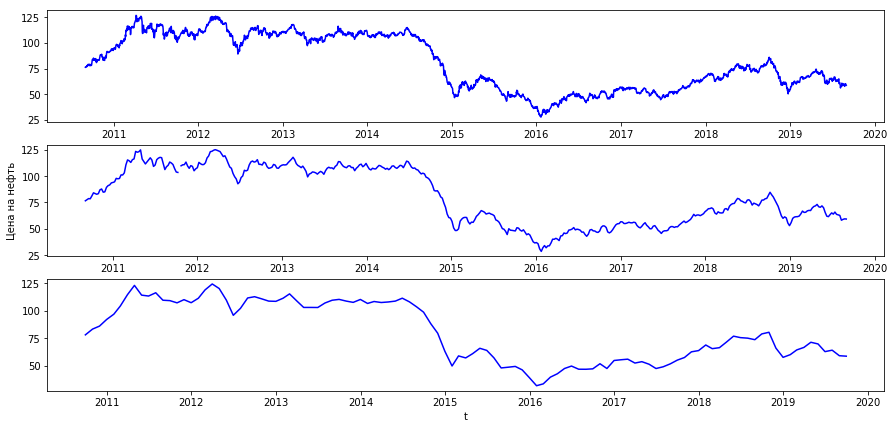

In [57]:
plt.figure(figsize=(15,7))
plt.subplot(3,1,1)
plt.plot(df_daily.index,df_daily.values, 'b')

plt.subplot(3,1,2)
plt.plot(df_weekly_m.index,df_weekly_m.values, 'b')
plt.ylabel('Цена на нефть')

plt.subplot(3,1,3)
plt.plot(df_monthly_m.index,df_monthly_m.values, 'b')
plt.xlabel('t')


Text(0.5, 0, 't')

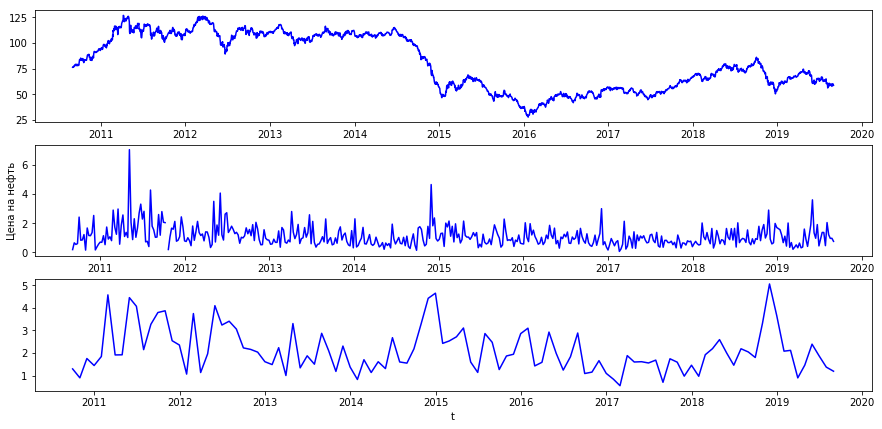

In [58]:
plt.figure(figsize=(15,7))
plt.subplot(3,1,1)
plt.plot(df_daily.index,df_daily.values, 'b')

plt.subplot(3,1,2)
plt.plot(df_weekly_s.index,df_weekly_s.values, 'b')
plt.ylabel('Цена на нефть')

plt.subplot(3,1,3)
plt.plot(df_monthly_s.index,df_monthly_s.values, 'b')
plt.xlabel('t')

### 5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

При семплировании по среднему значению общий тренд изменения цены нефти сохраняется, но теряются детали. 
При семплировании по дисперсии, меняется характер данных. Он отображает изменение разброса значений внутри промежутка времени, а не изменение цены. Максимумы именно там, где были резкие скачки цен.